데이터를 활용한 도미와 빙어 분류하는 지도학습 
- 2개의 클래스 분류 = 이진 분류(binary classification)

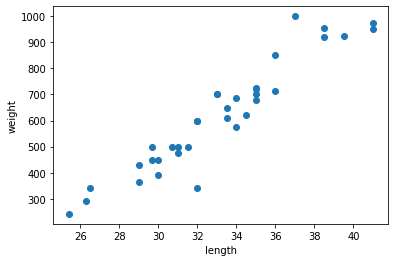

In [23]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0,
               33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0,
               38.5, 38.5, 39.5, 41.0, 41.0]

bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0,
               450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0,
               610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0,
               714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

import matplotlib.pyplot as plt # matplotlib의 pyplot 함수를 plt로 줄여서 사용

plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

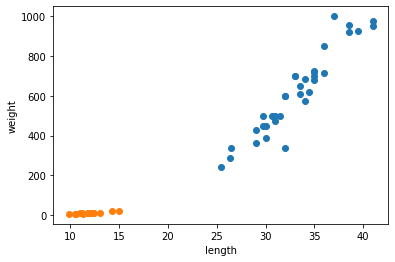

In [24]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 첫 번째 머신러닝 프로그램

In [25]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

fish_data = [[l, w] for l, w in zip(length, weight)]

print(fish_data)

fish_target = [1] * 35 + [0] * 14
print(fish_target)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [26]:
from sklearn.neighbors import KNeighborsClassifier 

In [27]:
kn = KNeighborsClassifier()

In [28]:
kn.fit(fish_data, fish_target)

KNeighborsClassifier()

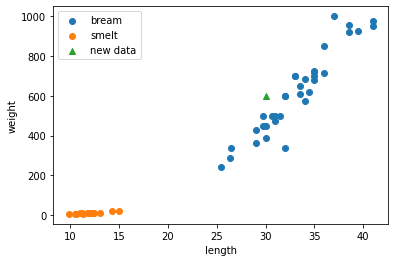

In [31]:
plt.scatter(bream_length, bream_weight, label='bream')
plt.scatter(smelt_length, smelt_weight, label='smelt')
plt.scatter(30, 600, marker='^', label='new data')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend(loc='upper left')
plt.show()

In [34]:
y_classes = kn.predict([[30, 600]])
fish_classes = {1:'bream', 0:'smelt'}
print('new data: ', [[30, 600]], '=> 분류 결과: ', fish_classes[y_classes[0]])

new data:  [[30, 600]] => 분류 결과:  bream


In [ ]:
print(kn._fit_X) # 훈련 데이터 
print(kn._y) # 결과 값에 대한 데이터

In [39]:
kn49 = KNeighborsClassifier(n_neighbors = 49)
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

0.7142857142857143

최적의 kn 개수 찾기

In [56]:
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)

kn_acc = []
for n in range(5, 50):
  # 최근접 이웃 개수 설정
  kn.n_neighbors = n
  # 점수 계산
  score = kn.score(fish_data, fish_target)
  kn_acc.append(score)

  # 정확도가 1 직전까지의 최근접 개수를 구하기 
  """
  if score < 1: 
    print(n, "개 이웃을 선택할 때", score)
    break
    """

In [ ]:
import numpy as np
plt.figure(figsize=(12,9))
plt.plot(range(5,50), kn_acc, label='Fish set')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.xticks(np.arange(0, 50, step=1))
plt.legend()
plt.show()

위에 두 코드를 하나로 한 번에 묶어 최대 효율로 적어보기

18 개 이웃을 선택할 때 0.9795918367346939


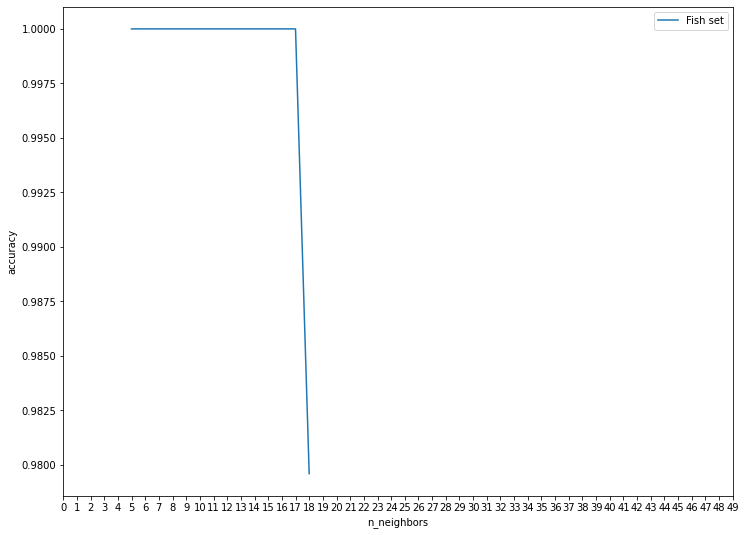

In [64]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)

kn_acc = []
count = 0
for n in range(5, 50):
  # 최근접 이웃 개수 설정
  kn.n_neighbors = n
  count = n
  # 점수 계산
  score = kn.score(fish_data, fish_target)
  kn_acc.append(score)

  # 정확도가 1 직전까지의 최근접 개수를 구하기 
  if score < 1: 
    print(n, "개 이웃을 선택할 때", score)
    break

plt.figure(figsize=(12, 9))
plt.plot(range(5, count+1), kn_acc, label='Fish set')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.xticks(np.arange(0, 50, step=1))
plt.legend()
plt.show()

